<a href="https://colab.research.google.com/github/mostafa12H/Admin_dashbooard/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Adam Mohamed

ID: 55-10644

Tutorial: 6

---

Name: Moustafa Hamada

ID:55-4254

Tutorial:6

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

We began by importing essential libraries, including pandas for data manipulation, numpy for numerical computations, and visualization tools like matplotlib and seaborn. We then loaded the telecom churn dataset directly from a provided URL using pd.read_csv()  and previewed its first few rows with df.head(). This step ensured we could understand the dataset's structure and contents, laying the foundation for subsequent analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("classic")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In this step, we conducted a detailed inspection of the dataset to identify its key characteristics and potential issues. We started by displaying the first few rows of the dataset to gain an overview of its structure and data types. Next, we computed basic statistics for numerical columns using df.describe(), which provided insights into metrics like mean, median, and standard deviation for features such as tenure.

We then checked for missing values and identified columns like TotalCharges with significant missing data, as well as duplicates, though there were none in this dataset. By evaluating data types with df.dtypes, we noted that TotalCharges, although numerical in nature, was stored as an object type, likely due to inconsistencies or missing values.

Further inspection of rows with missing TotalCharges confirmed this issue. We also rechecked for missing values after any conversions to ensure consistency. Unique customer counts were verified to confirm the dataset's integrity, revealing that the customerID column had some duplicates. Finally, we explored unique values in categorical columns to understand their distributions and check for anomalies, laying the groundwork for appropriate data cleaning and preprocessing

In [2]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic statistics for numerical columns
print("\nBasic statistics of the dataset:")
print(df.describe())

#  Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

#  Check for duplicate rows
print("\nNumber of duplicate rows in the dataset:")
print(df.duplicated().sum())

# Evaluate data types for each column
print("\nData types of each column:")
print(df.dtypes)


# Inspect rows with missing 'TotalCharges'
missing_totalcharges = df[df['TotalCharges'].isnull()]
print("\nRows with missing TotalCharges:")
print(missing_totalcharges)


#  Re-check for missing values after conversion
print("\nMissing values after conversion:")
print(df.isnull().sum())

#  Verify 'customerID'
print("\nUnique customerID count:", df['customerID'].nunique())
print("Total rows:", df.shape[0])



#  Inspect unique values in categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


First few rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Strea

## Data Cleaning

To prepare the dataset for analysis and modeling, we first removed the customerID column, as it is a unique identifier with no predictive value. The MonthlyCharges and TotalCharges columns were cleaned by converting them to numeric types after removing non-numeric characters, and missing values in TotalCharges were filled with the median to maintain data integrity without skewing the distribution. Outliers in these columns were visualized using boxplots to assess their potential impact on analysis. For service-related columns, redundant categories like "No phone service" and "No internet service" were consolidated into "No" for consistency. Binary categorical variables (e.g., gender, Partner) were encoded numerically, while multi-class categorical variables (e.g., Contract, PaymentMethod) were transformed using one-hot encoding to make them suitable for machine learning. A correlation matrix and scatterplots were generated to identify relationships between features and Churn, helping to uncover trends and guide feature selection. The cleaned dataset was saved for further modeling, ensuring it was free of missing values, properly encoded, and ready for predictive analysis.


Number of missing values in TotalCharges after imputation: 0

Number of missing values in MonthlyCharges: 0
Number of missing values in TotalCharges: 0


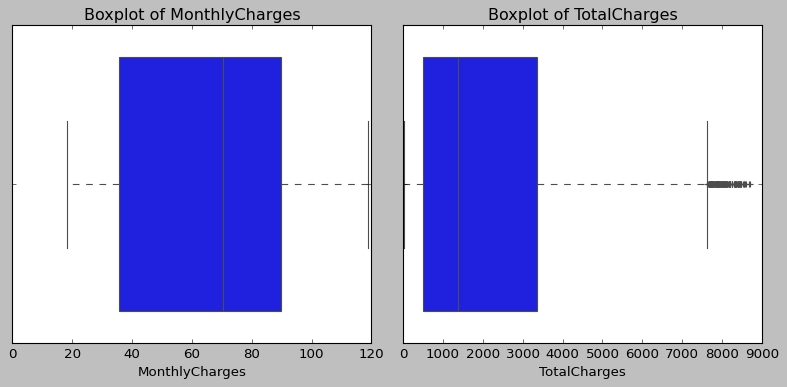


Missing values after cleaning:
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electron

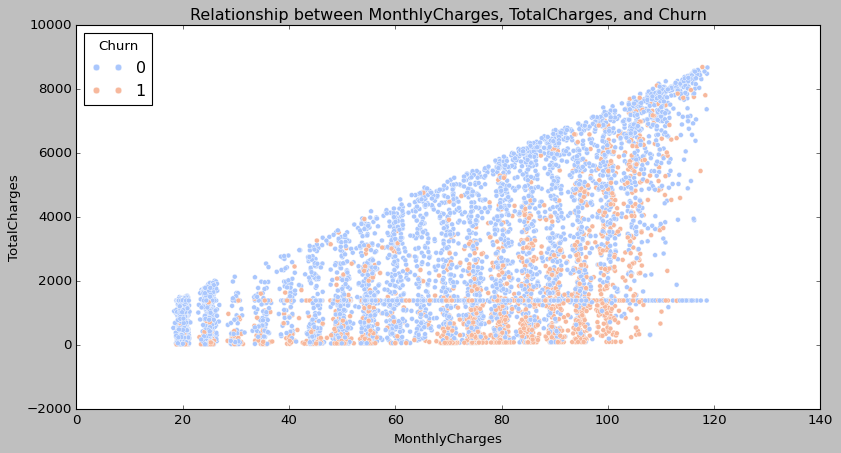

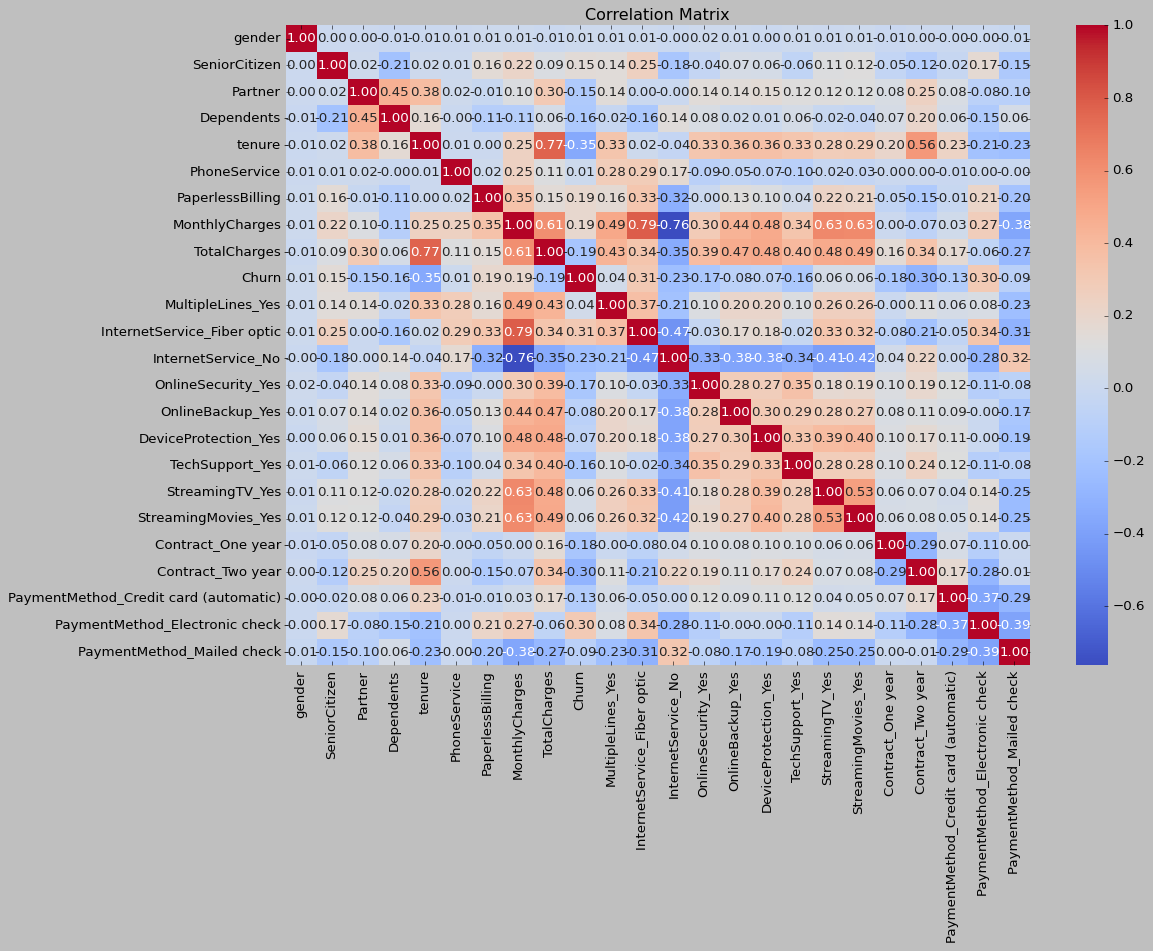

In [3]:
#  Drop customerID column as it's not needed for analysis
df.drop(columns=['customerID'], inplace=True)

# Ensure 'MonthlyCharges' and 'TotalCharges' are cleaned and numeric
# Clean 'TotalCharges' by removing non-numeric characters
df['TotalCharges'] = df['TotalCharges'].str.replace(r'[^0-9.]', '', regex=True)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Ensure 'MonthlyCharges' is also numeric
if df['MonthlyCharges'].dtype == 'object':
    df['MonthlyCharges'] = df['MonthlyCharges'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Handle missing values in 'TotalCharges'
median_totalcharges = df['TotalCharges'].median()  # Calculate the median
df['TotalCharges'] = df['TotalCharges'].fillna(median_totalcharges)  # Fill missing values with the median

# Verify there are no more missing values
print("\nNumber of missing values in TotalCharges after imputation:", df['TotalCharges'].isnull().sum())

# Check for missing values in MonthlyCharges and TotalCharges
print("\nNumber of missing values in MonthlyCharges:", df['MonthlyCharges'].isnull().sum())
print("Number of missing values in TotalCharges:", df['TotalCharges'].isnull().sum())

# Visualize outliers for 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(10, 5))

# Boxplot for MonthlyCharges
plt.subplot(1, 2, 1)
sns.boxplot(x=df['MonthlyCharges'], color='blue')
plt.title('Boxplot of MonthlyCharges')

# Boxplot for TotalCharges
plt.subplot(1, 2, 2)
sns.boxplot(x=df['TotalCharges'], color='blue')
plt.title('Boxplot of TotalCharges')

plt.tight_layout()
plt.show()

#  Handle 'No service' categories by converting them to 'No'
service_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_columns:
    df[col] = df[col].replace({'No phone service': 'No', 'No internet service': 'No'})

#  Convert 'Churn' column to numeric (Yes=1, No=0)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


#  Convert binary categorical columns to numeric
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    df[col] = df[col].map({'Male': 0, 'Female': 1, 'Yes': 1, 'No': 0})

#  Convert multi-class categorical columns using one-hot encoding
multi_class_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_class_columns, drop_first=True)

#  Verify dataset after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nUpdated dataset info after encoding:")
print(df.info())

#  Save the cleaned dataset for further use
df.to_csv("cleaned_telecom_churn.csv", index=False)
print("\nCleaned dataset has been saved as 'cleaned_telecom_churn.csv'.")

# Visualize the relationship between MonthlyCharges, TotalCharges, and Churn
plt.figure(figsize=(12, 6))

# Scatterplot for MonthlyCharges vs TotalCharges, colored by Churn
sns.scatterplot(x=df['MonthlyCharges'], y=df['TotalCharges'], hue=df['Churn'], palette='coolwarm')
plt.title("Relationship between MonthlyCharges, TotalCharges, and Churn")
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.legend(title="Churn", loc='upper left')
plt.show()

# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Exploratory Data Analysis

:**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

we examined the correlation between customer churn and other attributes in the dataset. By calculating the correlation matrix and isolating the Churn column, we identified the attributes most positively and negatively correlated with customer churn.

The attributes most positively correlated with churn include InternetService_Fiber optic (0.31), PaymentMethod_Electronic check (0.30), MonthlyCharges (0.19), and PaperlessBilling (0.19). These indicate that customers with fiber optic internet, electronic check payments, higher monthly charges, and paperless billing are more likely to churn. On the other hand, the attributes most negatively correlated with churn are tenure (-0.35), Contract_Two year (-0.30), InternetService_No (-0.23), TotalCharges (-0.19), and Contract_One year (-0.18). This suggests that customers with longer tenures, longer contracts (one or two years), no internet service, and higher total charges are less likely to churn.

These insights help identify key factors influencing churn behavior, guiding feature selection for predictive modeling and offering actionable business strategies, such as targeting high-risk groups with specific retention plans.

In [4]:
# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Extract correlations with 'Churn'
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Step 3: Display the most positively and negatively correlated attributes
print("\nAttributes most positively correlated with Churn:")
print(churn_correlation[churn_correlation > 0].head(5))  # Top positive correlations

print("\nAttributes most negatively correlated with Churn:")
print(churn_correlation[churn_correlation < 0].tail(5))  # Top negative correlations



Attributes most positively correlated with Churn:
Churn                             1.000000
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling                  0.191454
Name: Churn, dtype: float64

Attributes most negatively correlated with Churn:
Contract_One year    -0.178225
TotalCharges         -0.187063
InternetService_No   -0.227578
Contract_Two year    -0.301552
tenure               -0.354049
Name: Churn, dtype: float64


**Answer for Q1**:

 Attributes most positively correlated with Churn:

Churn                             1.000000

InternetService_Fiber optic       0.307463

PaymentMethod_Electronic check    0.301455

MonthlyCharges                    0.192858

PaperlessBilling                  0.191454



Attributes most negatively correlated with Churn:

Contract_One year    -0.178225

TotalCharges         -0.187063

InternetService_No   -0.227578

Contract_Two year    -0.301552

tenure               -0.354049


:**Q2: Which payment method has the highest churn rate?**

**Visualization**

we calculated the churn rate for each payment method by isolating customers using specific payment types and computing the percentage of churn within those groups. The results showed that customers using the Electronic check payment method have the highest churn rate at 45.29%, followed by Mailed check at 19.20%, and Credit card (automatic) at 15.25%.

The bar plot clearly visualizes these differences, emphasizing that the Electronic check payment method is significantly associated with higher churn rates. This insight suggests that the payment method plays a role in customer retention, possibly due to convenience or perceived reliability issues with specific methods. Companies might consider investigating why customers using electronic checks are more likely to churn and exploring strategies to encourage them to switch to more stable payment methods like automatic credit card payments.


Churn rates by payment method:
                           PaymentMethod  ChurnRate
1         PaymentMethod_Electronic check  45.285412
2             PaymentMethod_Mailed check  19.201995
0  PaymentMethod_Credit card (automatic)  15.253123


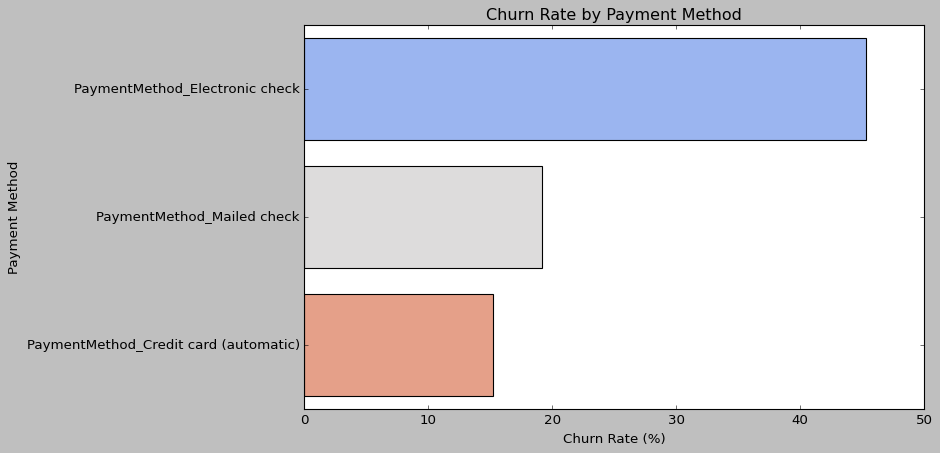

In [5]:
# Extract PaymentMethod columns
payment_columns = [col for col in df.columns if col.startswith('PaymentMethod_')]

# Calculate churn rate for each payment method
churn_rates = {}
for payment in payment_columns:
    churn_rate = df.loc[df[payment] == 1, 'Churn'].mean() * 100
    churn_rates[payment] = churn_rate

# Convert churn rates into a sorted DataFrame for visualization
churn_rates_df = pd.DataFrame(list(churn_rates.items()), columns=['PaymentMethod', 'ChurnRate'])
churn_rates_df.sort_values(by='ChurnRate', ascending=False, inplace=True)

# Display the churn rates
print("\nChurn rates by payment method:")
print(churn_rates_df)

# Plot churn rates for visualization with updated syntax to avoid warnings
plt.figure(figsize=(10, 6))
sns.barplot(x='ChurnRate', y='PaymentMethod', data=churn_rates_df, hue='PaymentMethod', dodge=False, palette='coolwarm')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Payment Method')
plt.legend([], [], frameon=False)
plt.show()



**Answer for Q2**: Electronic check with  45.285412

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

To analyze after how many months customers commonly churn, we filtered the dataset to include only churned customers and visualized the distribution of their tenure. The histogram, combined with a KDE (Kernel Density Estimate) plot, reveals that the majority of churned customers tend to leave within the first few months of their tenure. Specifically, the 25th percentile is at 2 months, the median (50th percentile) is at 10 months, and the 75th percentile is at 29 months.

This distribution highlights that most churn occurs early in the customer lifecycle, with a sharp decline in churn frequency as tenure increases. These insights suggest that customer retention efforts should focus heavily on the first 10 months of service to reduce churn. Early intervention strategies, such as onboarding support, loyalty rewards, or personalized offers, could significantly improve customer retention during this critical period.

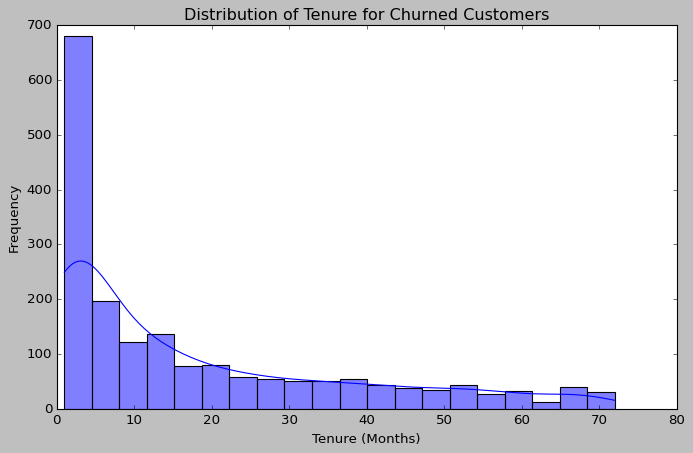


Tenure Percentiles for Churned Customers:
25th Percentile: 2.0 months
50th Percentile (Median): 10.0 months
75th Percentile: 29.0 months


In [6]:
#  Filter churned customers
churned_customers = df[df['Churn'] == 1]

#  Plot the distribution of tenure for churned customers
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['tenure'], kde=True, color='blue', bins=20)
plt.title("Distribution of Tenure for Churned Customers")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

#  Calculate and display percentiles
tenure_percentiles = np.percentile(churned_customers['tenure'], [25, 50, 75])
print("\nTenure Percentiles for Churned Customers:")
print(f"25th Percentile: {tenure_percentiles[0]} months")
print(f"50th Percentile (Median): {tenure_percentiles[1]} months")
print(f"75th Percentile: {tenure_percentiles[2]} months")


**Answer for Q3**: The histogram shows that a majority of customers churn very early in their tenure (close to 0–10 months).




## Data Preparation for Modelling

we first defined the features (X) and target variable (y). The features included all columns except Churn, which was set as the target. Next, we standardized the numeric features (MonthlyCharges, TotalCharges, and tenure) using StandardScaler to ensure that these variables were on a similar scale, which is essential for many machine learning algorithms to perform optimally.

The dataset was then split into training and test sets, with 80% of the data allocated for training and 20% for testing. This split ensures that the model can be trained and evaluated on separate data to assess its performance accurately. The stratify=y parameter was used to maintain the class distribution of the target variable in both sets, which is critical given the imbalanced nature of the data (about 73% of customers did not churn, while 27% did).

Finally, the shape of the training and test sets was displayed to confirm the split, and the class distribution in the training set was checked to verify that the imbalance was preserved. This step ensures that the data is ready for modeling, with appropriate preprocessing applied and a clear division for training and evaluation.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Define features (X) and target (y)
X = df.drop(columns=['Churn'])  # All columns except the target variable
y = df['Churn']                # Target variable

#  Standardize numeric features
numeric_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Display the shape of the training and test sets
print("\nShape of Training Set:")
print(f"Features: {X_train.shape}, Target: {y_train.shape}")

print("\nShape of Test Set:")
print(f"Features: {X_test.shape}, Target: {y_test.shape}")

# Check for imbalance in the target variable
print("\nChurn Distribution in Training Set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nData prepared for modelling.")



Shape of Training Set:
Features: (5625, 23), Target: (5625,)

Shape of Test Set:
Features: (1407, 23), Target: (1407,)

Churn Distribution in Training Set:
Churn
0    73.422222
1    26.577778
Name: proportion, dtype: float64

Data prepared for modelling.


## Modelling

For the modeling step, we used a Decision Tree Classifier to predict customer churn. The model was initialized with a maximum depth of 5 and the Gini impurity criterion, which balances model complexity and interpretability. Limiting the depth helps to prevent overfitting while ensuring that the model captures meaningful patterns in the data.

The model was trained on the training set (X_train and y_train), and predictions were made on the test set (X_test). Both the class predictions (y_pred) and the probabilities for the positive class (Churn) were computed. This allows for flexibility in evaluating the model, such as by examining raw predictions or using probability thresholds.

This setup ensures that the Decision Tree model is trained and ready for evaluation, where we can assess its performance metrics (e.g., accuracy, precision, recall) and analyze the rules it generated. The simplicity of the Decision Tree also allows for easy interpretation, which is valuable for explaining churn behavior.

In [8]:
from sklearn.tree import DecisionTreeClassifier

#  Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = tree_model.predict(X_test)
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]  # Probability for the positive class (Churn)

print("\nModel training completed.")



Model training completed.


### Tree Visualization

The visualization of the Decision Tree provides a clear representation of how the model makes predictions based on the features. Each node in the tree represents a decision rule based on a specific feature, while the branches indicate the possible outcomes of that rule. The tree splits the data recursively, aiming to minimize impurity (using the Gini index in this case) at each step.

The colored nodes show the classification outcomes, with orange representing "Churn" and blue representing "No Churn." The size of each node corresponds to the number of samples at that point, and the "value" in each node indicates the distribution of "No Churn" and "Churn" instances.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


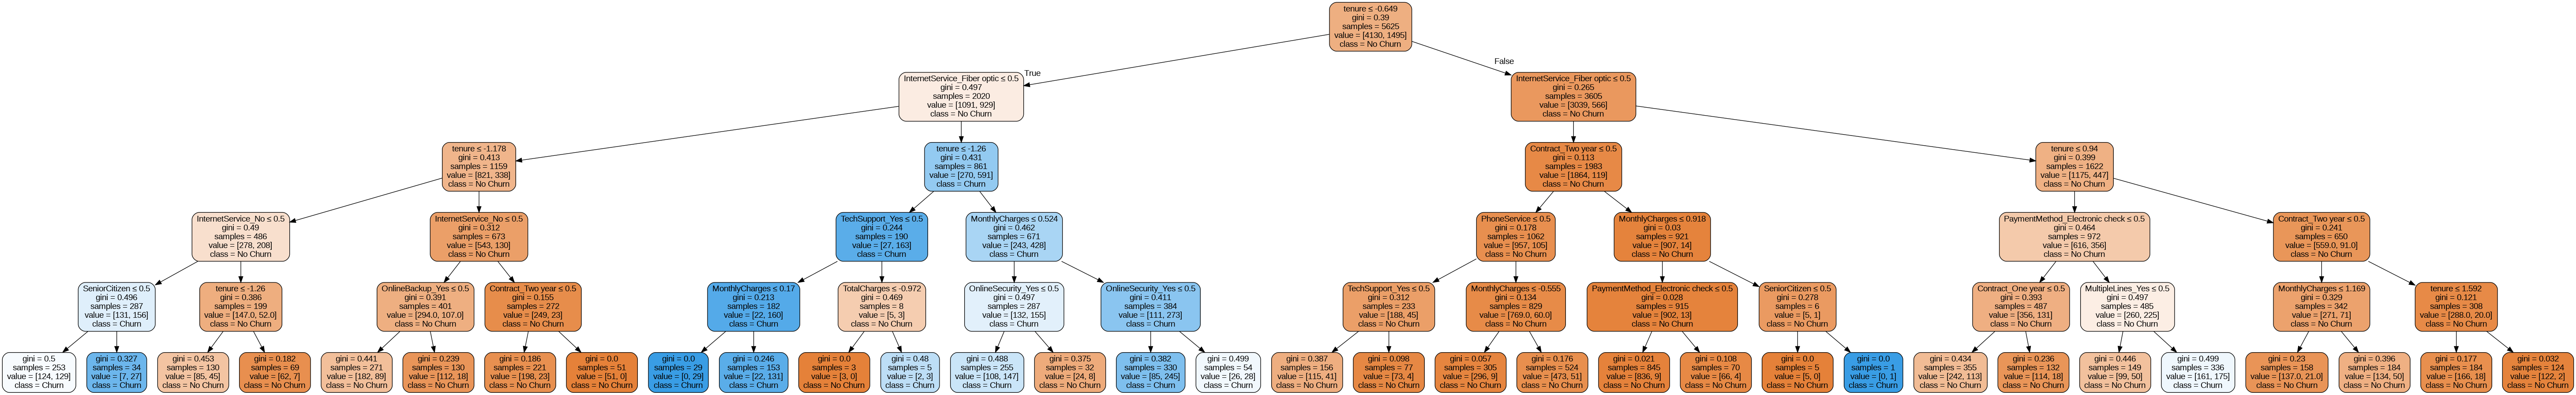

In [9]:
!apt-get install -y graphviz
!pip install graphviz
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image

# Export the decision tree to Graphviz format
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the tree using graphviz
graph = Source(dot_data)
graph.format = "png"
graph.render("decision_tree")  # Saves the tree as decision_tree.png

# Display the tree image in Colab
from IPython.display import Image
Image(filename="decision_tree.png")


## Evaluation

The evaluation of the Decision Tree model provides an insightful overview of its performance in predicting customer churn. The classification report reveals an overall accuracy of 78%, with a precision of 58% and recall of 60% for the Churn class. While the model performs well for the majority class (No Churn), there is a moderate imbalance in its ability to correctly predict churn cases, which can be improved with additional optimization or balanced training data.

The confusion matrix shows that out of 374 churn cases, the model correctly predicts 223, but misclassifies 151 as No Churn. Similarly, it accurately predicts 872 out of 1033 No Churn cases, with 161 false positives.

The ROC Curve demonstrates the trade-off between the true positive rate (sensitivity) and the false positive rate, with an AUC-ROC score of 0.82, indicating good discriminative ability. The relatively high AUC confirms that the model has a strong ability to differentiate between churn and non-churn customers.

These results indicate that the model performs reasonably well in predicting churn, but there is room for improvement in handling the minority Churn class, potentially through techniques like oversampling, under-sampling, or alternative algorithms tailored for imbalanced data.


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407


Confusion Matrix:
[[872 161]
 [151 223]]


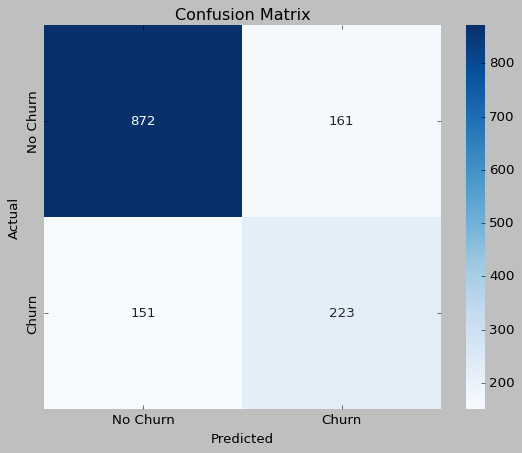


Accuracy: 0.78

AUC-ROC Score: 0.82


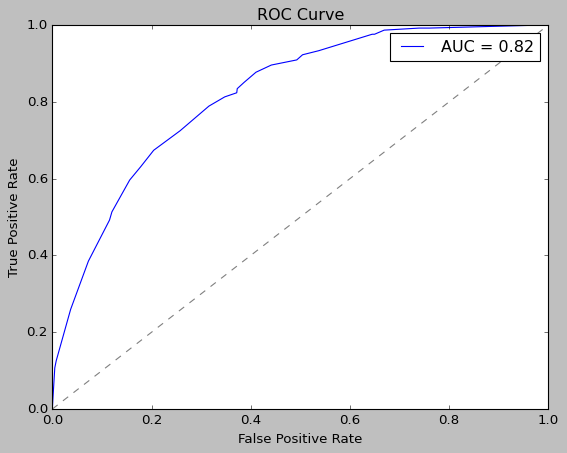


Evaluation completed.


In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#  Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

#  AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC Score: {roc_auc:.2f}")

#  Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
print("\nEvaluation completed.")


## Bonus (Optional) :RandomForest

The Random Forest model was evaluated as an alternative to the Decision Tree model. It achieved an accuracy of 78%, the same as the Decision Tree, but demonstrated a better AUC-ROC score of 0.84, indicating improved ability to distinguish between churn and non-churn customers.

From the classification report, the Random Forest model had a precision of 66% for the Churn class and a recall of 39%, which shows some improvement in precision but a reduction in recall compared to the Decision Tree. The confusion matrix indicates that the model correctly classified 960 No Churn cases and 144 Churn cases, while misclassifying 73 No Churn cases as Churn and 230 Churn cases as No Churn.

The ROC curve further illustrates the Random Forest's overall performance, with the curve being closer to the top-left corner compared to a random classifier. This performance demonstrates that the Random Forest model is slightly more robust in predicting customer churn, particularly when focusing on overall classification ability (AUC-ROC). However, the challenges with correctly predicting the Churn class persist due to the class imbalance in the dataset, suggesting the need for techniques like resampling or fine-tuning to further enhance results.







Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1033
           1       0.66      0.39      0.49       374

    accuracy                           0.78      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.77      0.78      0.76      1407


Random Forest Accuracy: 0.78

Random Forest Confusion Matrix:
[[960  73]
 [230 144]]


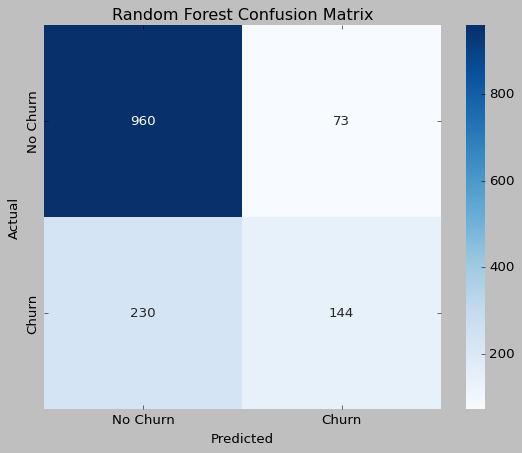


Random Forest AUC-ROC Score: 0.84


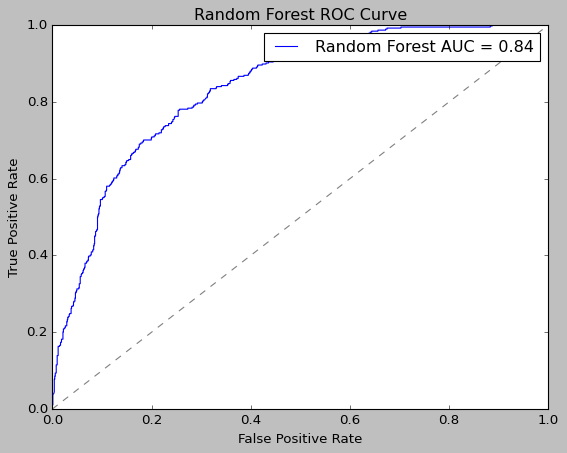

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability for the positive class (Churn)

# Evaluate the Random Forest model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.2f}")

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# AUC-ROC Score for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
print(f"\nRandom Forest AUC-ROC Score: {rf_roc_auc:.2f}")

# Plot the ROC Curve for Random Forest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest AUC = {rf_roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Model Comparison:

Decision Tree:

Accuracy: 78%

Precision (Churn): 58%

Recall (Churn): 60%

F1-Score (Churn): 59%

AUC-ROC: 82%

The Decision Tree correctly identified 223 churn cases but missed 151 (false negatives). It also misclassified 161 non-churn customers as churn (false positives). This model is easy to interpret and performs well in identifying actual churn cases, with a high recall of 60%.

Random Forest:

Accuracy: 78%

Precision (Churn): 66%

Recall (Churn): 39%

F1-Score (Churn): 49%

AUC-ROC: 84%

The Random Forest identified 144 churn cases but missed 230. It misclassified only 73 non-churn customers as churn, significantly reducing false positives compared to the Decision Tree. While it has lower recall than the Decision Tree, it achieves better precision and a higher AUC-ROC score.

The Decision Tree has better recall, meaning it identifies more actual churn cases, making it suitable if capturing churn is critical.
The Random Forest has higher precision, meaning fewer false positives, and a better AUC-ROC score, making it superior in overall prediction quality.
Both models have the same accuracy, but the Random Forest balances true positives and false positives more effectively.

Recommendation:

1.Choose Random Forest if reducing false positives and maximizing overall prediction quality is the goal, as it offers higher precision and AUC-ROC.

2.Choose Decision Tree if interpretability and capturing as many actual churn cases as possible (high recall) are more important.


We recommend using the **Random Forest model** because of its strong overall performance and reliability. It excels at minimizing false positives, making it the most effective choice for addressing voluntary churn and helping telecom companies retain customers more efficiently.